# Trabajo de Juan

## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago
de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo
que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino.

## Desarrollo

### 0. Obtención de datos

In [1]:
#Se importan las librerías necesarias para el problema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
df = pd.read_csv('dataset_SCL.csv')

In [3]:
df.shape

(68206, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


<AxesSubplot: >

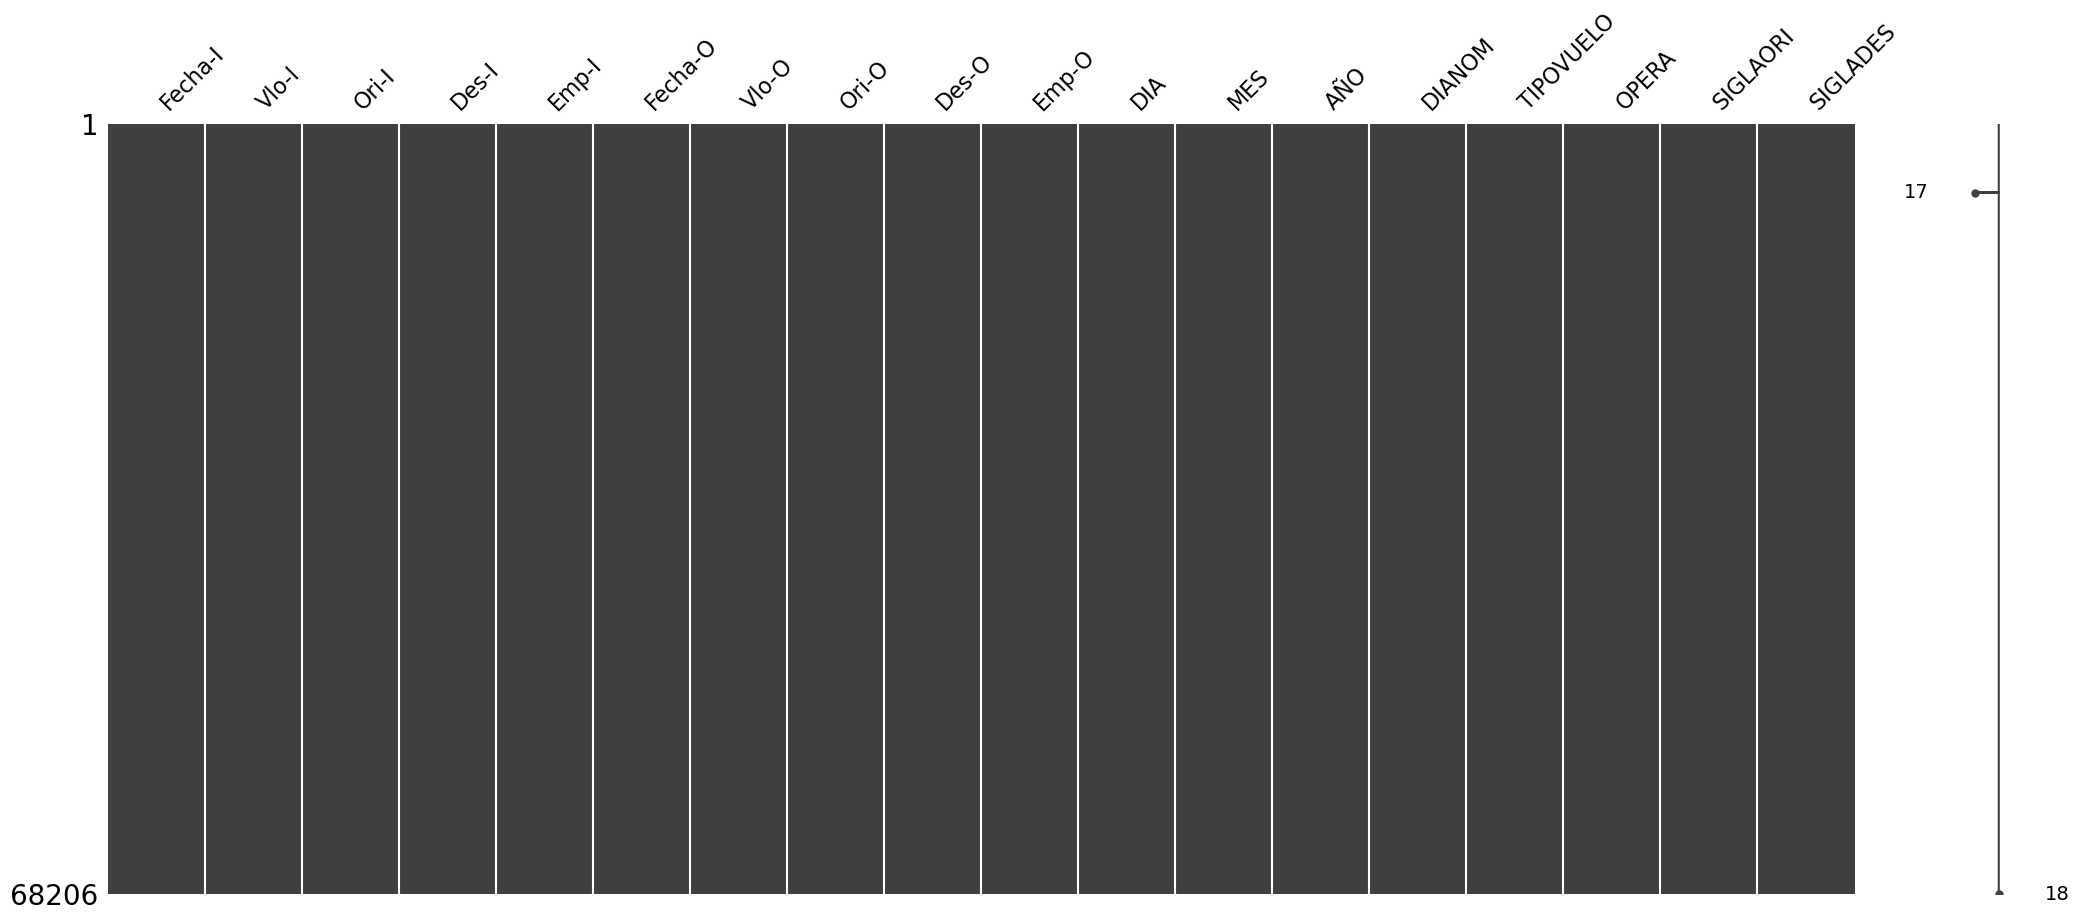

In [5]:
msng.matrix(df)
# From the plot above we can see there is no abscence of values.

In [6]:
df.describe()
# There is only 3 int classes

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

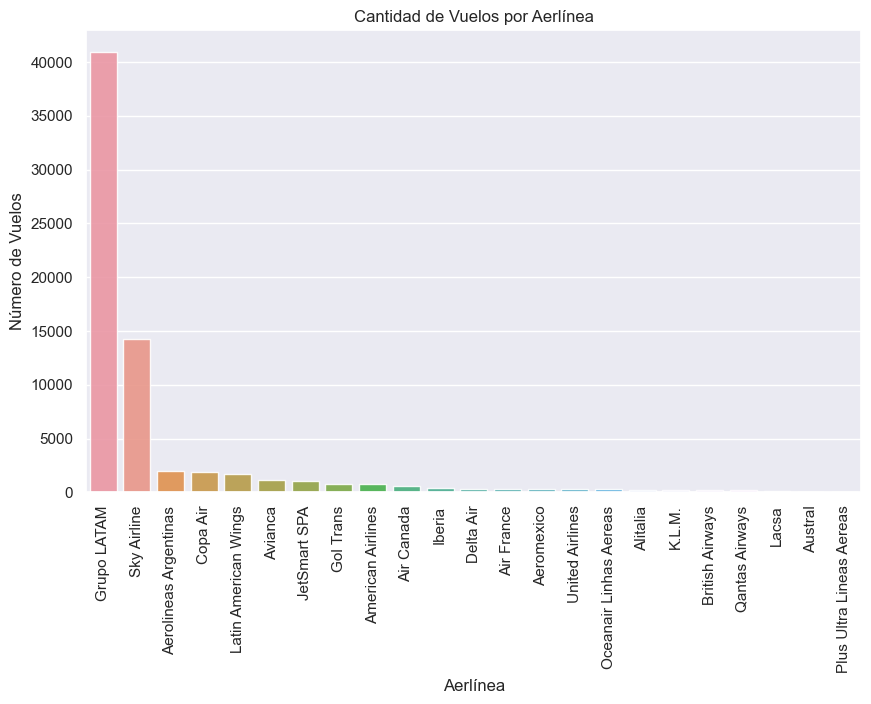

In [7]:
vuelos_aerolineas = df['OPERA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.barplot(x=vuelos_aerolineas.index, y=vuelos_aerolineas.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Aerlínea')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Aerlínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [8]:
# Canidad maxima y minima de operaciones por linea.
(df['OPERA'] == 'Grupo LATAM').sum(), (df['OPERA'] == 'Plus Ultra Lineas Aereas').sum()

(40892, 49)

Notar que Grupo Latam tiene casi el mercado completo de los vuelos con origen santiago de chile, luego lo sigue Sky Airlines y despues se pega una bajada profunda a Aerolineas Argentina. La aerolinea con menos vuelos es PLus Ultra Lineas Aereas quien tiene solo 49 vuelos.

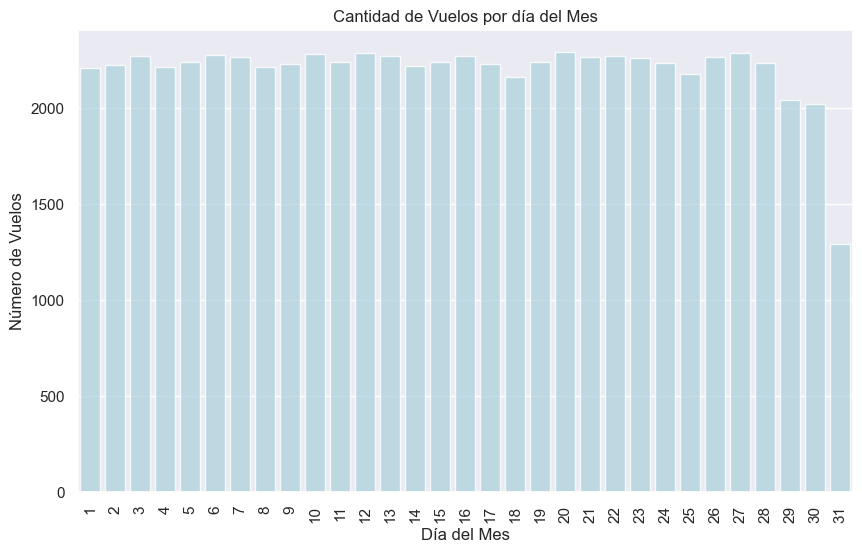

In [9]:
vuelos_dia = df['DIA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style = "darkgrid")
sns.barplot(x=vuelos_dia.index, y=vuelos_dia.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [10]:
df['DIA'].value_counts().describe()

count      31.000000
mean     2200.193548
std       179.782539
min      1290.000000
25%      2218.000000
50%      2238.000000
75%      2269.500000
max      2290.000000
Name: DIA, dtype: float64

Notar que la cantidad de vuelos por dia al mes es bastante parejo a lo largo del mes, a expecion del dia 31, lo que puede deberse al cambio de mes, aunque se podria seguir explorando a que se debe esa disminucion.

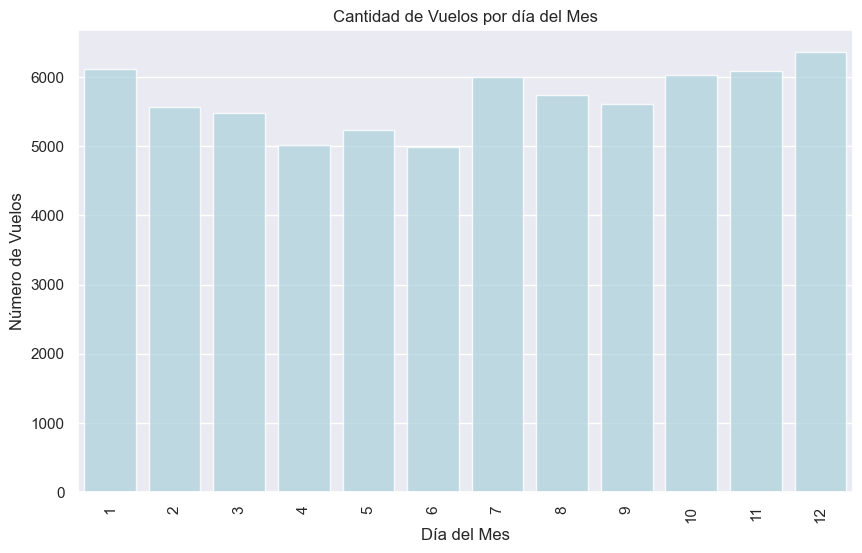

In [11]:
vuelos_mes = df['MES'].value_counts()
plt.figure(figsize=(10,6))
sns.set(style = "darkgrid")
sns.barplot(x=vuelos_mes.index, y=vuelos_mes.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [12]:
df['MES'].value_counts().describe()

count      12.000000
mean     5683.833333
std       447.355225
min      4981.000000
25%      5421.500000
50%      5677.000000
75%      6044.000000
max      6356.000000
Name: MES, dtype: float64

Notar que el mes de diciembre es el mes con mayor cantidad de vuelos, seguido por enero y luego noviembre. Llama la atencion que febrero no este dentro del top 3. El mes con menor cantidad de vuelos es junio.

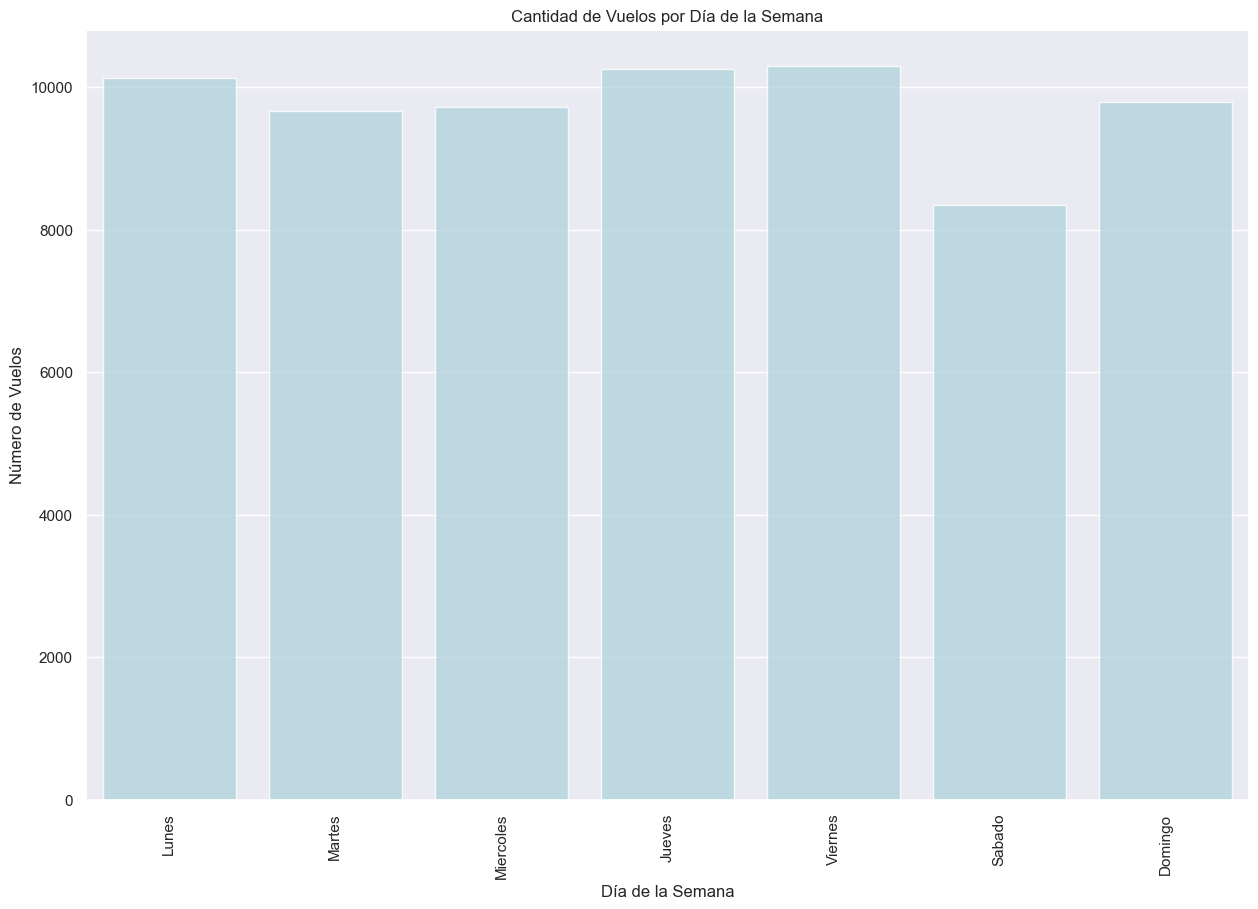

In [13]:
vuelos = df['DIANOM'].value_counts()
dias = [vuelos.index[2], vuelos.index[5], vuelos.index[4], vuelos.index[1], vuelos.index[0], vuelos.index[6], vuelos.index[3]]
valores_dias = [vuelos.values[2], vuelos.values[5], vuelos.values[4], vuelos.values[1], vuelos.values[0], vuelos.values[6], vuelos.values[3]]

sns.set(style="darkgrid")
sns.barplot(x=dias, y=valores_dias, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Día de la Semana')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [14]:
vuelos

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

In [15]:
vuelos.describe()

count        7.000000
mean      9743.714286
std        665.168829
min       8352.000000
25%       9692.000000
50%       9796.000000
75%      10191.000000
max      10292.000000
Name: DIANOM, dtype: float64

Notar que los vuelos por dia de semana tambien son bastante parejos, el dia viernes es el con mayor cantiad de vuelos (10.292) seguido por jueves y lunes, y el sabado es el dia con menor cantidad de vuelos (8352)

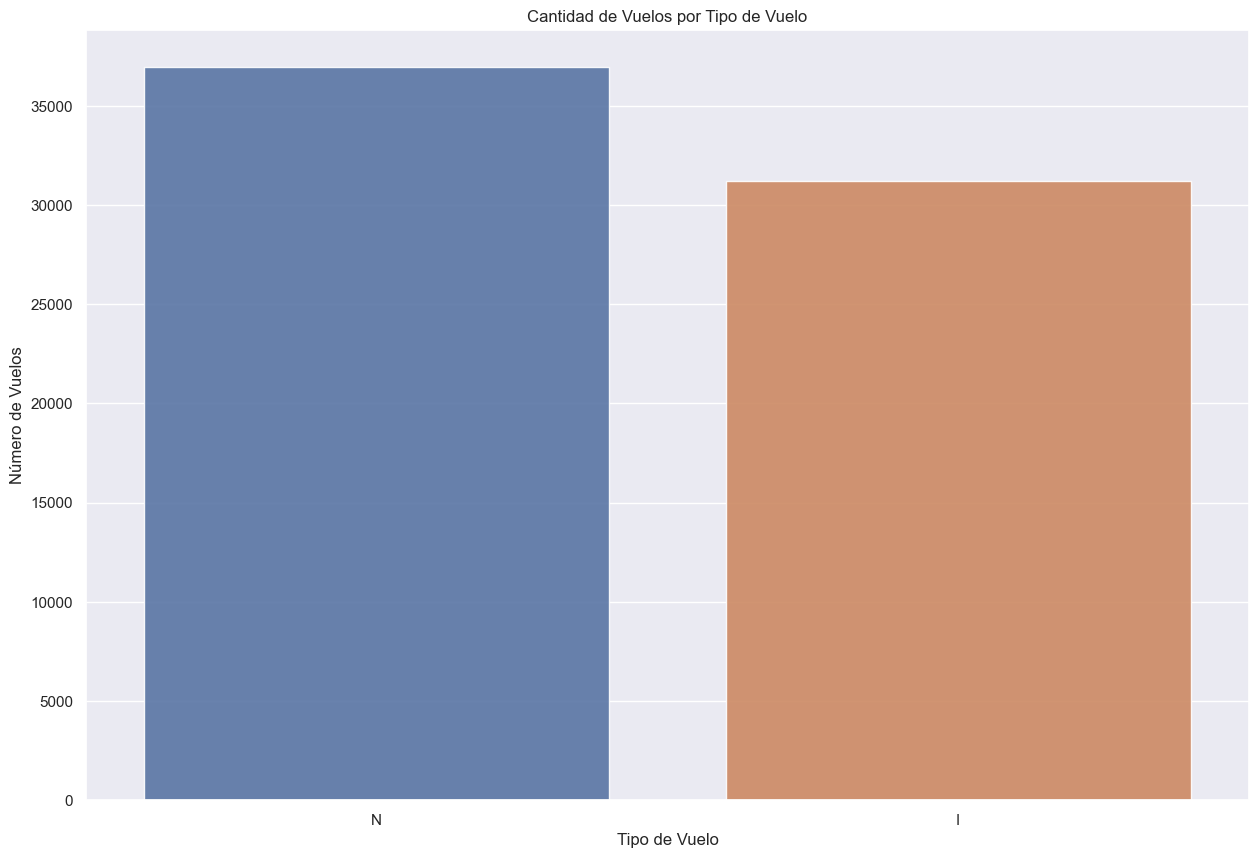

In [16]:
vuelos = df['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=vuelos.index, y=vuelos.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Tipo de Vuelo')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.show()

Notar que hay un mayor porcentaje de vuelos con origen santiago que viajan dentro del territorio nacional, aunque la diferencia no es mucha.

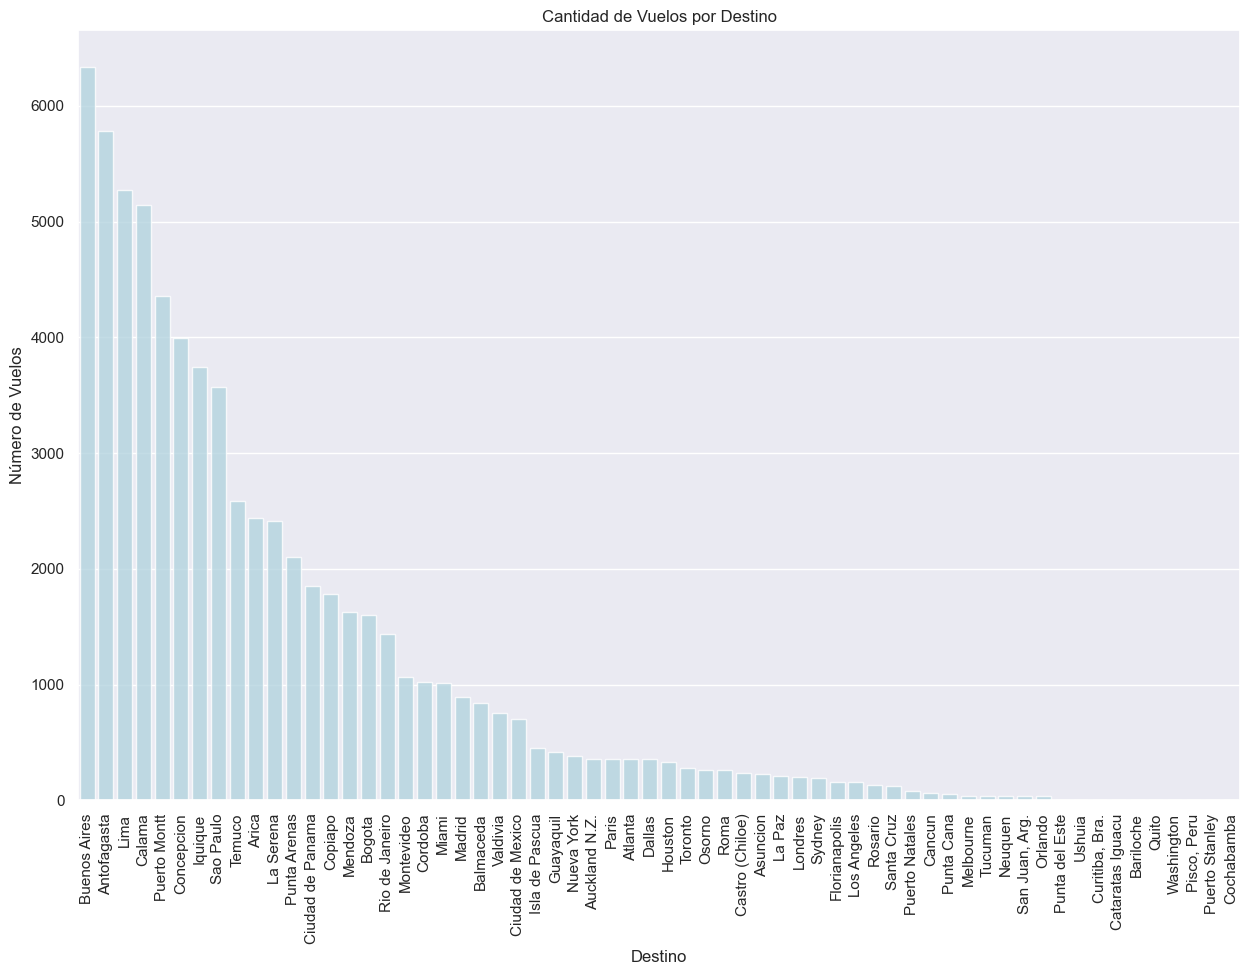

In [17]:
vuelos = df['SIGLADES'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=vuelos.index, y=vuelos.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Destino')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)

plt.show()

Notar que buenos aires es el destino preferido dentro de los vuelos con origen santiago, seguido por Antofagasta y Lima. Sin embargo si vemos el panorama completo, dentro de los top 10 destinos, la mayoia son chilenos, lo que explica el hecho de que hayan mas vuelos nacionales que internacionales.

In [18]:
destinos_segun_tipo = pd.crosstab(df['SIGLADES'], df['TIPOVUELO'])
destinos_segun_tipo

TIPOVUELO,I,N
SIGLADES,,
Antofagasta,0,5786
Arica,0,2436
Asuncion,232,0
Atlanta,358,0
Auckland N.Z.,361,0
...,...,...
Toronto,283,0
Tucuman,38,0
Ushuia,6,0


In [19]:
destinos_segun_tipo['I'].sum(), destinos_segun_tipo['N'].sum()

(31240, 36966)

Respecto a las distribuciones, se puede ver que dentro de todo la data está distribuida de manera bastante balanceada. De todas formas se pueden notar ciertas particularidades en algunas columnas: 
* En las aerolíneas LATAM Airlines es la con mayor cantidad de vuelo debido a que es la más grande aquí en chile y es la que tiene mayor cantidad de destinos. SKY Airlines sería la segunda más grande y de ahí en adelante las demás son bastante similares en cuanto a vuelos. 
* En cuanto a los días del mes, se puede ver como el día 31 tiene menor cantidad que los demás días y esto se puede deber a que hay menos días 31 durante el año.
* Con los días de semana, el día sábado es el único en el que se nota una diferencia. Aquí puede ser porque la gente prefiere ese día para quedarse en donde sea que esté y aprovecharlo en caso que esté de viaje para poder recorrer o solamente descansar.
* Por parte de los destinos se puede ver que gran parte se lo llevan las ciudades chilenas del norte. Esto puede ser por un alto flujo en minería.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

* **temporada_alta** : 1 si **Fecha-I** está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no

In [20]:
from datetime import datetime

def temporada_alta(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0
    

In [21]:
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)

In [22]:
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

In [23]:
print(f'Porcentaje vuelos temporada alta: {round(22032/(22032+46174)*100,2)}%, Porcentaje vuelos temporada baja: {round(46174/(22032+46174)*100,2)}%')

Porcentaje vuelos temporada alta: 32.3%, Porcentaje vuelos temporada baja: 67.7%


* **dif_min** : diferencia en minutos entre **Fecha-O** y **Fecha-I** .

In [24]:
def dif_min(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    dif_min = ((fecha_o - fecha_i).total_seconds())/60
    return dif_min
        

In [25]:
df['dif_min'] = df.apply(dif_min, axis = 1)

In [26]:
df['dif_min'].head()

0    3.0
1    9.0
2    9.0
3    3.0
4   -2.0
Name: dif_min, dtype: float64

* **atraso_15** : 1 si **dif_min** > 15, 0 si no.

In [27]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

In [28]:
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [29]:
print(f'Porcentaje de atrasos: {round(12614/(12614+55592)*100,2)}%, Porcentaje de vuelos puntuales: {round(55592/(12614+55592)*100,2)}%')

Porcentaje de atrasos: 18.49%, Porcentaje de vuelos puntuales: 81.51%


* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a **Fecha-I**.

In [30]:
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').time()
    mañana_min = datetime.strptime("05:00", '%H:%M').time() # time obtiene la hora
    mañana_max = datetime.strptime("11:59", '%H:%M').time()
    tarde_min = datetime.strptime("12:00", '%H:%M').time()
    tarde_max = datetime.strptime("18:59", '%H:%M').time()
    noche_min1 = datetime.strptime("19:00", '%H:%M').time()
    noche_max1 = datetime.strptime("23:59", '%H:%M').time()
    noche_min2 = datetime.strptime("00:00", '%H:%M').time()
    noche_max2 = datetime.strptime("4:59", '%H:%M').time()
    
    if(fecha_time > mañana_min and fecha_time < mañana_max):
        return 'mañana'
    elif(fecha_time > tarde_min and fecha_time < tarde_max):
        return 'tarde'
    elif((fecha_time > noche_min1 and fecha_time < noche_max1) or
         (fecha_time > noche_min2 and fecha_time < noche_max2)):
        return 'noche'

In [31]:
df['periodo_dia'] = df['Fecha-I'].apply(get_periodo_dia)

In [32]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche


In [33]:
df['periodo_dia'].value_counts()

tarde     25050
mañana    24867
noche     17059
Name: periodo_dia, dtype: int64

In [34]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,46.0,1,tarde
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,...,2017,Lunes,I,JetSmart SPA,Santiago,Lima,1,16.0,1,tarde
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,...,2017,Miercoles,I,JetSmart SPA,Santiago,Lima,1,40.0,1,tarde
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,...,2017,Viernes,I,JetSmart SPA,Santiago,Lima,1,13.0,0,tarde


In [35]:
# Exportando columnas adicionales a un archivo synthetic_features.csv
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', index = False)

In [36]:
# Revision archivo creado
synthetic_features_df = pd.read_csv('synthetic_features.csv')
synthetic_features_df.head()

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3.0,0,noche
1,1,9.0,0,noche
2,1,9.0,0,noche
3,1,3.0,0,noche
4,1,-2.0,0,noche


### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

* ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

In [37]:
def calcular_tasa(df, columna):
    # Generamos un diccionario con la cantidad de atrasos de cada 'key' de una columna determinada
    dic_atrasos = {}
    for _, row in df.iterrows():
        if row['atraso_15'] == 1:
            if row[columna] not in dic_atrasos:
                dic_atrasos[row[columna]] = 1
            else:
                dic_atrasos[row[columna]] += 1
    
    # Contamos los vuelos por cada 'key' de una columna determinada
    total_values = df[columna].value_counts()
    
    # Para cada 'key' de una columna determinada, la tasa se obtiene dividiendo el total de vuelos por el total de atrasos
    dic_tasas = {}
    for name, total in total_values.iteritems():
        if name in dic_atrasos:
            dic_tasas[name] = round((dic_atrasos[name]/total)*100, 2) #Esto se modifico e la version original, antes la division estava al reves
        else:
            dic_tasas[name] = 0
    # se retorna un dataframe con las tasas de cada 'key' segun la columna/atributo determinado        
    return pd.DataFrame.from_dict(data = dic_tasas, orient = 'index', columns = ['Tasa (%)'])

In [38]:
tasas_destinos = calcular_tasa(df, 'SIGLADES')
tasas_destinos

,Tasa (%)
Buenos Aires,25.57
Antofagasta,14.64
Lima,23.04
Calama,12.22
Puerto Montt,16.85
...,...
Quito,100.00
Washington,0.00
"Pisco, Peru",0.00
Puerto Stanley,100.00


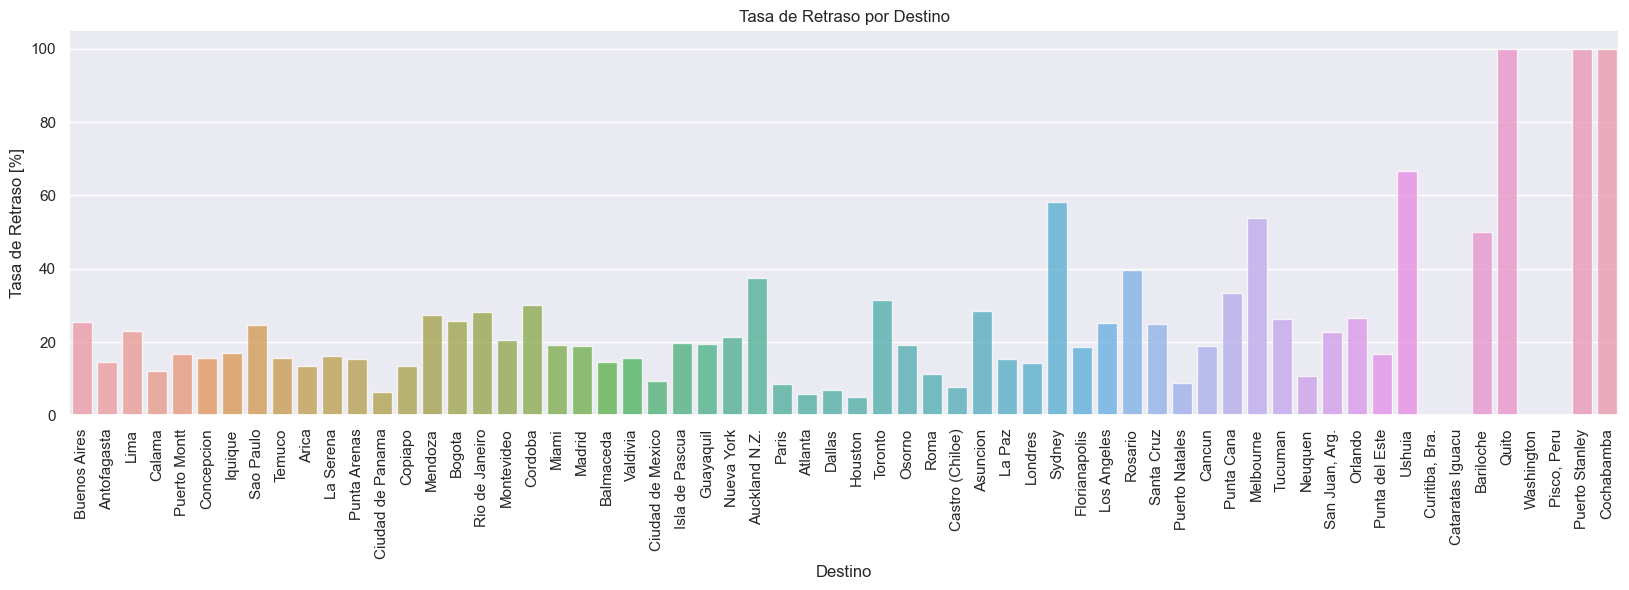

In [39]:
tasas_destinos_values = df['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=df['SIGLADES'].value_counts().index, y=tasas_destinos['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Destino')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [40]:
df['atraso_15'][df['SIGLADES']=='Quito']

17061    1
55144    1
Name: atraso_15, dtype: int32

In [41]:
df['atraso_15'][df['SIGLADES']=='Puerto Stanley']

61213    1
Name: atraso_15, dtype: int32

In [42]:
df['atraso_15'][df['SIGLADES']=='Cochabamba']

67692    1
Name: atraso_15, dtype: int32

Notar que tanto Quito, como Puerto Stanley y Cochabamba, tienen tasas de 100% de retraso

In [43]:
# Informacion de tasas de destinos
tasas_destinos.describe()

,Tasa (%)
count,62.000000
mean,24.092419
std,21.739309
min,0.000000
25%,13.562500
50%,19.035000
75%,26.432500
max,100.000000


In [44]:
tasas_aerolineas = calcular_tasa(df, 'OPERA')
tasas_aerolineas

,Tasa (%)
Grupo LATAM,17.87
Sky Airline,17.76
Aerolineas Argentinas,24.01
Copa Air,6.27
Latin American Wings,40.68
Avianca,26.56
JetSmart SPA,17.90
Gol Trans,35.61
American Airlines,6.74
Air Canada,45.66


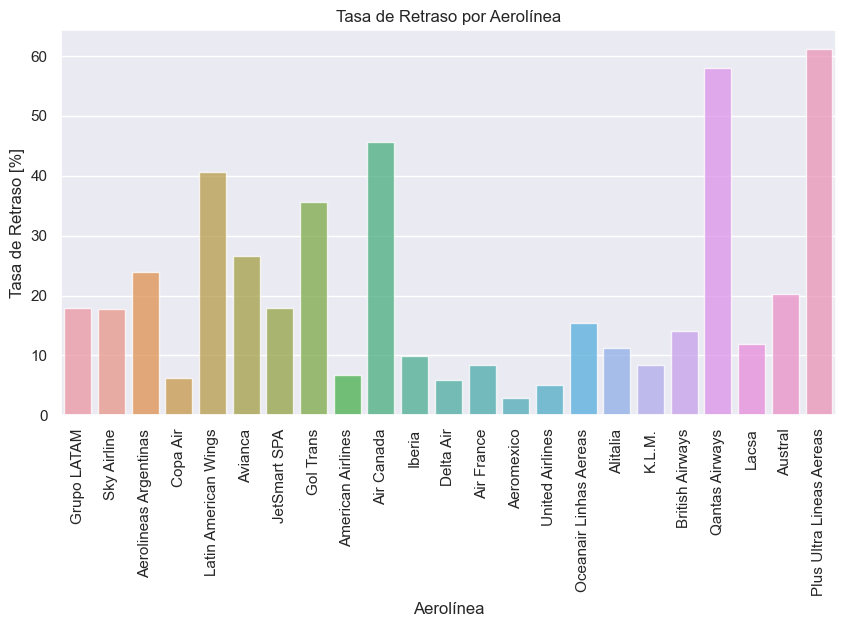

In [45]:
tasas_aerolineas_values = df['OPERA'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_aerolineas_values, y=tasas_aerolineas['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Aerolínea')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [46]:
df['OPERA'].value_counts()

Grupo LATAM                 40892
Sky Airline                 14298
Aerolineas Argentinas        1949
Copa Air                     1850
Latin American Wings         1674
Avianca                      1152
JetSmart SPA                 1095
Gol Trans                     806
American Airlines             757
Air Canada                    565
Iberia                        362
Delta Air                     358
Air France                    358
Aeromexico                    351
United Airlines               335
Oceanair Linhas Aereas        279
Alitalia                      259
K.L.M.                        251
British Airways               205
Qantas Airways                195
Lacsa                          92
Austral                        74
Plus Ultra Lineas Aereas       49
Name: OPERA, dtype: int64

In [47]:
tasas_aerolineas.describe()

,Tasa (%)
count,23.000000
mean,20.508696
std,16.768670
min,2.850000
25%,8.375000
50%,15.410000
75%,25.285000
max,61.220000


Notar que Plus Ultra Lineas Aereas es la aerolinea con menos vuelos y a su vez la con mayor atrasos de la region. Ademas podemos dstacar que la media y mediana para la tasa de aerolines disminuye levemente respecto a la meia y mediana de la tasa de destinos.

In [48]:
df['OPERA'].value_counts().corr(tasas_aerolineas['Tasa (%)'])

-0.04248741469522736

Al parecer no hay mucha correlacion entre el numero de vuelos con los atrasos de aerolineas. Se destaca Grupo Latam, que pese a ser la aerolinea con mayor cantidad de vuelos, esta un poco mas arriba de la media.

In [49]:
tasas_meses = calcular_tasa(df, 'MES')
tasas_meses

,Tasa (%)
12,25.41
1,16.01
11,19.72
10,22.60
7,29.34
8,17.34
9,17.24
2,15.16
3,11.51
5,15.78


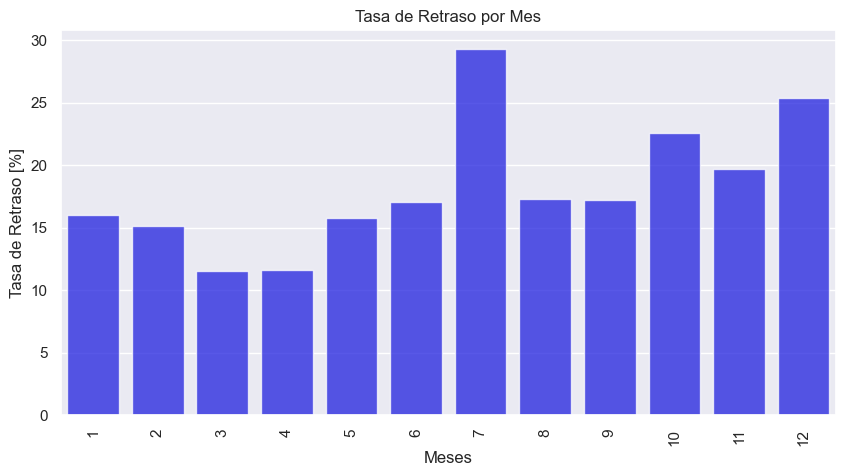

In [50]:
tasas_meses_values = df['MES'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_meses_values, y=tasas_meses['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Mes')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Meses', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [51]:
df['MES'].value_counts()

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64

Notar que julio es el mes con mayor tasa de retraso, aqui se podria averiguar mas de su causa. Lo sigue el mes de diciembre que igual se explica por la gran cantidad de vuelos que se generan en ese mes, seguido por octubre.
Los meses con menor tasa de retraso son marzo y mayo, con tasas de 11,51 y 11.65% respectivamente.

In [52]:
tasas_meses.describe()

,Tasa (%)
count,12.000000
mean,18.238333
std,5.292880
min,11.510000
25%,15.625000
50%,17.170000
75%,20.440000
max,29.340000


In [53]:
tasas_dias = calcular_tasa(df, 'DIANOM')
tasas_dias

,Tasa (%)
Viernes,22.20
Jueves,19.95
Lunes,20.22
Domingo,16.11
Miercoles,17.08
Martes,16.91
Sabado,16.32


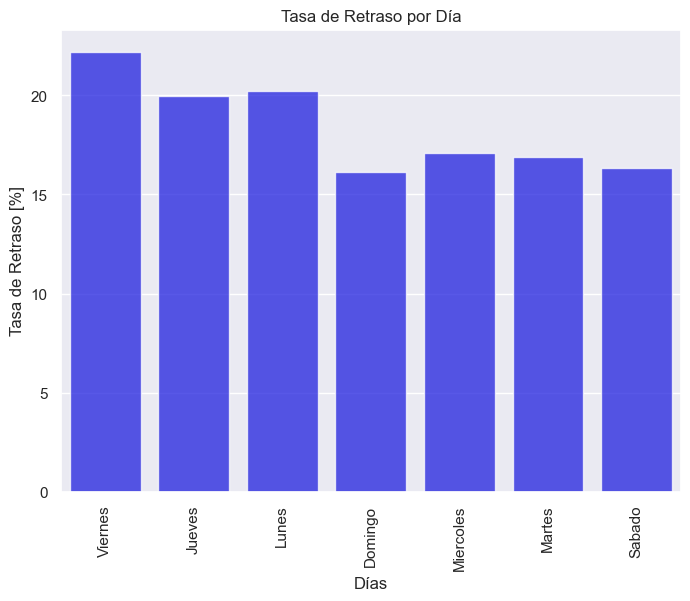

In [54]:
tasas_dias_values = df['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (8,6))
sns.barplot(x=tasas_dias_values, y=tasas_dias['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Día')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Días', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [55]:
tasas_dias.describe()

,Tasa (%)
count,7.000000
mean,18.398571
std,2.369525
min,16.110000
25%,16.615000
50%,17.080000
75%,20.085000
max,22.200000


In [56]:
df['DIANOM'].value_counts()

Viernes      10292
Jueves       10251
Lunes        10131
Domingo       9796
Miercoles     9722
Martes        9662
Sabado        8352
Name: DIANOM, dtype: int64

In [57]:
df['DIANOM'].value_counts().corr(tasas_dias['Tasa (%)'])

0.6873450144055986

Del grafico e Tasa de Retraso por Dia, se observa que el dia viernes es el con mayor tasa de retraso, seguido por el dia lunes y jueves, mientras que el dia domingo es el que presenta la menor tasa de retraso. Aqui se puede ver mas una correlacion positiva entre el numero de vuelos y la cantidad de atrasos que ocurren en cada dia

In [58]:
tasas_temporada = calcular_tasa(df, 'temporada_alta')
tasas_temporada

,Tasa (%)
0,17.93
1,19.68


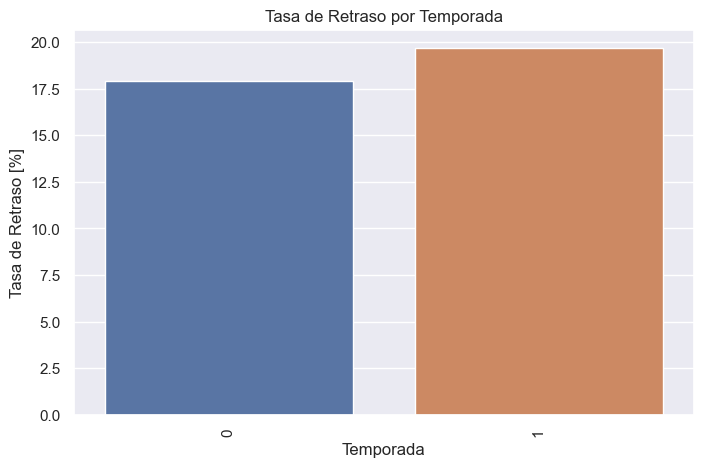

In [59]:
tasas_temporada_values = df['temporada_alta'].value_counts().index

plt.figure(figsize = (8, 5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_temporada_values, y=tasas_temporada['Tasa (%)'])
plt.title('Tasa de Retraso por Temporada')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [60]:
tasas_temporada.describe()

,Tasa (%)
count,2.000000
mean,18.805000
std,1.237437
min,17.930000
25%,18.367500
50%,18.805000
75%,19.242500
max,19.680000


In [61]:
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

Es de esperar que para la temporada alta se esperen mayor cantidad de atrasos dado por la mayor demanda de vuelos.

In [62]:
tasas_tipovuelo = calcular_tasa(df, 'TIPOVUELO')
tasas_tipovuelo

,Tasa (%)
N,15.06
I,22.56


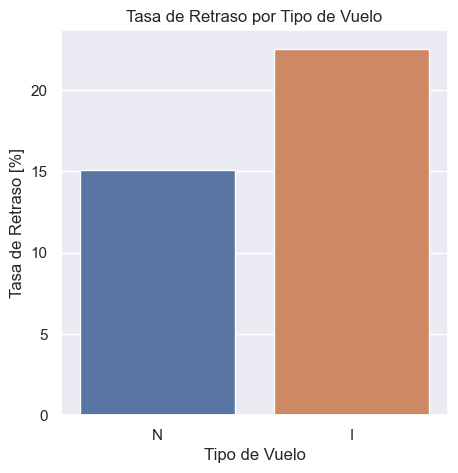

In [63]:
tasas_tipovuelo_values = df['TIPOVUELO'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_tipovuelo_values, y=tasas_tipovuelo['Tasa (%)'])
plt.title('Tasa de Retraso por Tipo de Vuelo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.show()

In [64]:
df['TIPOVUELO'].value_counts()

N    36966
I    31240
Name: TIPOVUELO, dtype: int64

In [65]:
tasas_tipovuelo.describe()

,Tasa (%)
count,2.000000
mean,18.810000
std,5.303301
min,15.060000
25%,16.935000
50%,18.810000
75%,20.685000
max,22.560000


Notar que pese a que la cantidad de vuelos nacionales e internacionales son bastante parecidas, se observa una mayor tasa de retraso para los vuelos internacionales, con una diferencia de mas del 7%. Esto se puede explicar debido a la mayor complejidad para los vuelos internacionales, los cuales muchas veces es necesario hacer escalas y estas tienen mas probabilidades de sufrir modificaciones.

In [66]:
tasa_periododia = calcular_tasa(df, 'periodo_dia')
tasa_periododia

,Tasa (%)
tarde,19.75
mañana,16.11
noche,19.92


In [67]:
df['periodo_dia'].value_counts()

tarde     25050
mañana    24867
noche     17059
Name: periodo_dia, dtype: int64

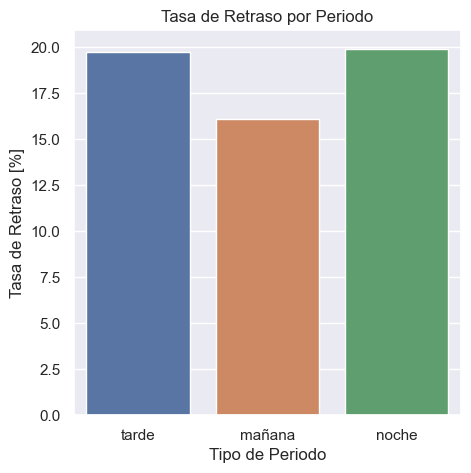

In [68]:
tasas_periodo_values = df['periodo_dia'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_periodo_values, y=tasa_periododia['Tasa (%)'])
plt.title('Tasa de Retraso por Periodo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Periodo', fontsize=12)
plt.show()

In [69]:
tasa_periododia.describe()

,Tasa (%)
count,3.000000
mean,18.593333
std,2.152309
min,16.110000
25%,17.930000
50%,19.750000
75%,19.835000
max,19.920000


Del grafico de tasa de retraso por periodo, se observa que en las mananas es cuando mas baja se presenta la tasa de retraso, mientras que por la tarde y noche esta es bastante parecida.

* ¿Qué variables esperarías que más influyeran en predecir atrasos?

Me parece que las que más podrían influir serían:
* **Aerolíneas**: Dependiendo de la calidad de gestión de cada aerolínea puede ser que afecte en sus programaciones. También puede que afecte el tipo de aerolínea, si es una low cost por ejemplo, estas llevan menos equipaje ya que es un costo extra para cada pasajero por lo que el tiempo de carga es menor, corriendo menor riesgo de retraso. 
* **Tipo de Vuelo**: esto puede afectar en cómo esté el clima del país de destino. Por ejemplo si se tiene que volar a argentina y se tiene que cruzar por la cordillera y hay un mal clima, es posible que se tenga que esperar un rato para poder salir.
* **Mes**: Esto va un poco de la mano con lo anterior, si es que es un mes del año donde el clima no es lo suficientemente adecuado, se tendría que esperar.  
 

In [70]:
comparacion_tasas = pd.concat([tasa_periododia.describe(), tasas_aerolineas.describe(), tasas_destinos.describe(), 
                               tasas_dias.describe(), tasas_meses.describe(), tasas_temporada.describe(), tasas_tipovuelo.describe()], axis=1)

comparacion_tasas.columns = ['periododia', 'aerolineas', 'destinos', 'dias', 'meses', 'temporada', 'tipovuelo']
comparacion_tasas = comparacion_tasas.T
comparacion_tasas

,count,mean,std,min,25%,50%,75%,max
periododia,3.0,18.593333,2.152309,16.11,17.9300,19.750,19.8350,19.92
aerolineas,23.0,20.508696,16.768670,2.85,8.3750,15.410,25.2850,61.22
destinos,62.0,24.092419,21.739309,0.00,13.5625,19.035,26.4325,100.00
dias,7.0,18.398571,2.369525,16.11,16.6150,17.080,20.0850,22.20
meses,12.0,18.238333,5.292880,11.51,15.6250,17.170,20.4400,29.34
temporada,2.0,18.805000,1.237437,17.93,18.3675,18.805,19.2425,19.68
tipovuelo,2.0,18.810000,5.303301,15.06,16.9350,18.810,20.6850,22.56


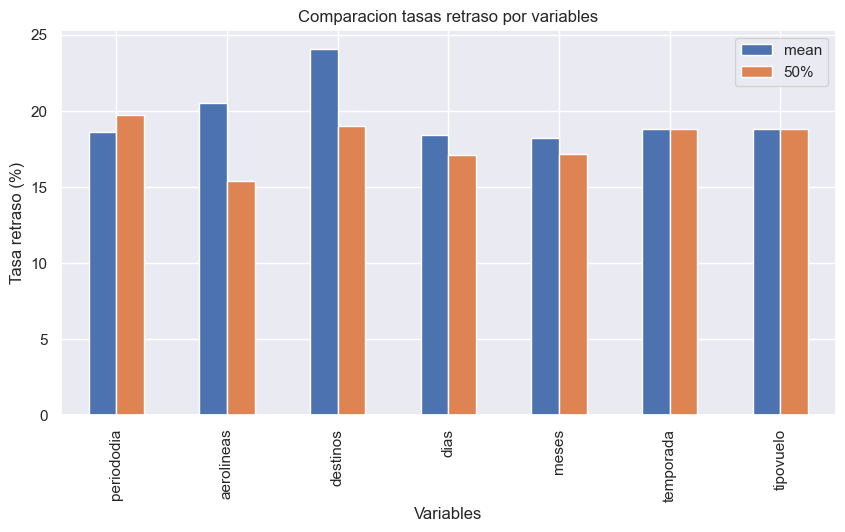

In [71]:
comparacion_tasas[['mean', '50%']].plot.bar(ylabel='Tasa retraso (%)', xlabel='Variables', figsize=(10,5), title='Comparacion tasas retraso por variables');

Viendo el grafico anterior, podemos complementar a la pregunta anterior, que el destino junto con el periodo del dia tambien son variables que podrian influir bastante en la probabilidad de retraso. Coincide en el caso de las aerolineas.

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,1,3.0,0,noche
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,1,9.0,0,noche
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,1,3.0,0,noche
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,1,-2.0,0,noche


In [74]:
# Se agregaron dos variables nuevas a data: temporada_alta y periodo_dia para complementar la data
data = shuffle(df[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'temporada_alta', 'periodo_dia', 'atraso_15']], random_state = 111)

In [75]:
data.head()

,OPERA,MES,TIPOVUELO,SIGLADES,DIANOM,temporada_alta,periodo_dia,atraso_15
13375,Sky Airline,3,N,Antofagasta,Viernes,0,mañana,0
35799,Grupo LATAM,7,N,Concepcion,Jueves,1,noche,0
48176,Grupo LATAM,9,N,Arica,Miercoles,1,noche,0
58675,Grupo LATAM,11,N,Iquique,Viernes,0,mañana,0
23374,Sky Airline,5,N,Valdivia,Lunes,0,mañana,0


In [76]:
# Chequeo general
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68206 entries, 13375 to 10196
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   OPERA           68206 non-null  object
 1   MES             68206 non-null  int64 
 2   TIPOVUELO       68206 non-null  object
 3   SIGLADES        68206 non-null  object
 4   DIANOM          68206 non-null  object
 5   temporada_alta  68206 non-null  int64 
 6   periodo_dia     66976 non-null  object
 7   atraso_15       68206 non-null  int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 4.4+ MB


In [77]:
# Verificamos si hay missing values
data.isna().sum()

OPERA                0
MES                  0
TIPOVUELO            0
SIGLADES             0
DIANOM               0
temporada_alta       0
periodo_dia       1230
atraso_15            0
dtype: int64

**Note:** Dado que tenemos missing values en periodo_dia, primero debemos rellenarlos, para eso utilizamos la funcion fillna() de pandas

In [78]:
data['periodo_dia'].value_counts()

tarde     25050
mañana    24867
noche     17059
Name: periodo_dia, dtype: int64

In [79]:
# Rellenaremos los datos faltantes de la columna periodo_dia con 'tarde' por ser el maximo. Aqui se podria mejorar con algun otro metodo de relleno
data['periodo_dia'].fillna('tarde', inplace=True)
data.isna().sum()

OPERA             0
MES               0
TIPOVUELO         0
SIGLADES          0
DIANOM            0
temporada_alta    0
periodo_dia       0
atraso_15         0
dtype: int64

In [80]:
# Separamos la data en features y label. Transformamos las columnas no numericas de features a numericas con pd.get-dummies
# Notar que agregamos un par de variables a las features que se tenian originalmente, ahora se incluyeron todas las variables menos el target
features = pd.concat([pd.get_dummies(data['OPERA'], prefix = 'OPERA'), data['MES'], pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), 
                     pd.get_dummies(data['SIGLADES'], prefix = 'DES'), pd.get_dummies(data['DIANOM'], prefix = 'DIA'),
                     data['temporada_alta'], pd.get_dummies(data['periodo_dia'], prefix = 'periodo_dia')], axis = 1)
label = data['atraso_15']

In [81]:
features.head()

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,DIA_Jueves,DIA_Lunes,DIA_Martes,DIA_Miercoles,DIA_Sabado,DIA_Viernes,temporada_alta,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde
13375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
35799,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
48176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
58675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
23374,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [82]:
# Creamos data procesado y lo guardamos en un archivo csv
data_procesado = pd.concat([features, label], axis=1)
data_procesado.to_csv('data_procesado.csv')

In [83]:
data_procesado.head()

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,DIA_Lunes,DIA_Martes,DIA_Miercoles,DIA_Sabado,DIA_Viernes,temporada_alta,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde,atraso_15
13375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
35799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
48176,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
58675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
23374,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [84]:
pd.read_csv('data_procesado.csv', index_col=0).head()

,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,...,DIA_Lunes,DIA_Martes,DIA_Miercoles,DIA_Sabado,DIA_Viernes,temporada_alta,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde,atraso_15
13375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
35799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
48176,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
58675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
23374,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [85]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)

In [86]:
x_train.shape, x_test.shape

((45698, 99), (22508, 99))

In [87]:
y_train.value_counts('%')

0    0.813799
1    0.186201
Name: atraso_15, dtype: float64

In [88]:
y_test.value_counts('%')

0    0.81762
1    0.18238
Name: atraso_15, dtype: float64

In [89]:
data['atraso_15'].value_counts('%')

0    0.81506
1    0.18494
Name: atraso_15, dtype: float64

**Note:** El problema a resolver corresponde a un problema de clasificacion binaria, por lo que debemos escoger algun modelo dentro de esta clasificacion. En el siguiente link encontramos una guia para escoger nuestro modelo:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### Modelacion

Se experimento con otros 2 modelos (adicionales a los 2 originales) de clasificacion dado la naturaleza del problema. Estos modelos fueron obtenidos del mapa de clasificacion de sklearn: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

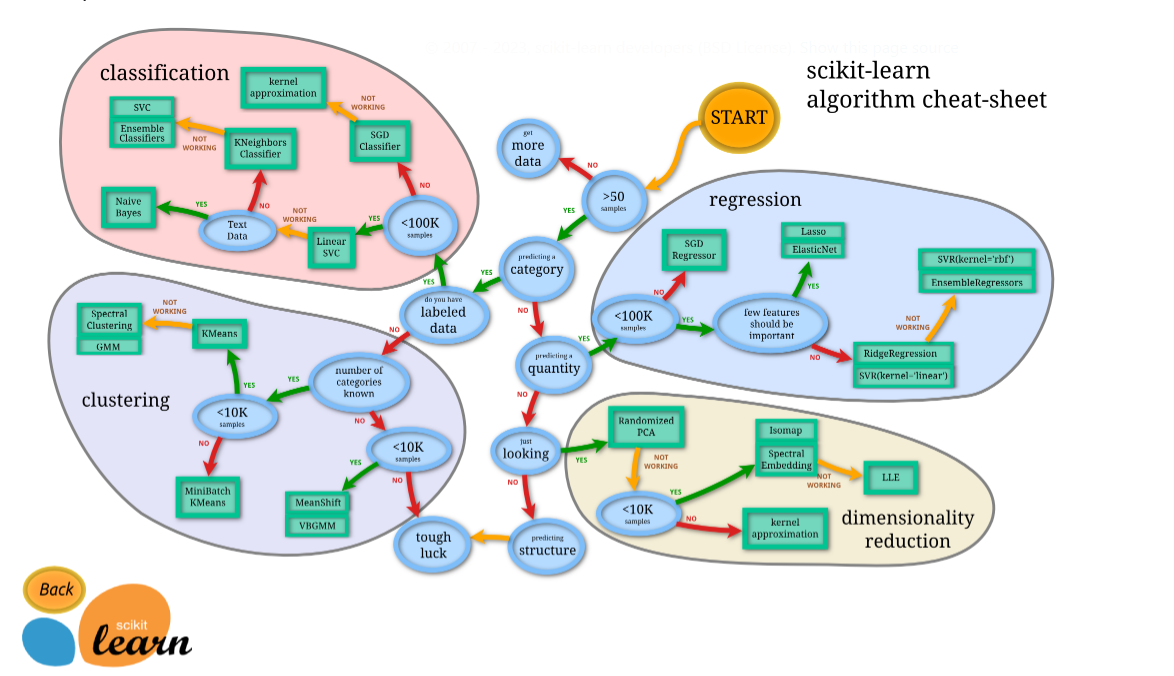

#### Utilizando Regresión logística

In [90]:
logReg = LogisticRegression(random_state=42)
model_logreg = logReg.fit(x_train, y_train)

In [125]:
y_pred_logreg = model_logreg.predict(x_test)

In [91]:
model_logreg.score(x_train, y_train)

0.8164033436911899

In [92]:
model_logreg.score(x_test, y_test)

0.8199306913097565

#### Métricas Regresión Logística

Existen diversas metricas para evluar el modelo y las podemos encontrar en el siguiente link: https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

In [93]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_logreg)

0.8199306913097565

In [94]:
# Confusion matrix
confusion_matrix(y_test, y_pred_logreg)

array([[18295,   108],
       [ 3945,   160]], dtype=int64)

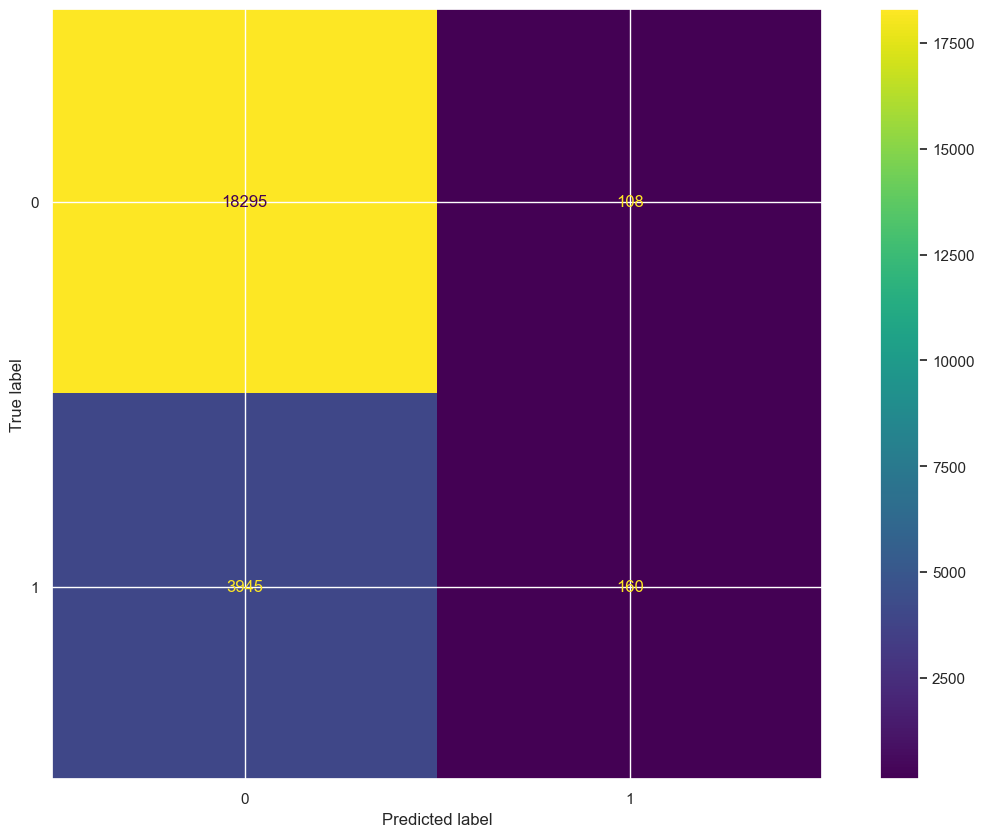

In [95]:
# Confusion matrix mostrado mas graficamente
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg);

In [96]:
# Porcentaje de valores correctamente predichos
print(f'{round((160+18295)/(len(y_test))*100,2)}%')

81.99%


Del grafio de confusion matrix, podemos ver que los valores predichos correctamente, True Positives and True Negatives, son 160 y 18295. Del modelo, el 81,99% de las predicciones son correctas.

In [97]:
y_test.value_counts()

0    18403
1     4105
Name: atraso_15, dtype: int64

Notar que no hay balance de clases, puesto que el numero de no atrasos es bastante mayor que el numero de atrasos. En este caso va a ser relevante la metrica de macro avg.

In [98]:
# Guardo las metricas del modelo de Regresion Logistica en un dataframe
report = classification_report(y_test, y_pred_logreg, output_dict=True)
logreg_metrics = pd.DataFrame(report).transpose()
logreg_metrics 

,precision,recall,f1-score,support
0,0.822617,0.994131,0.900278,18403.000000
1,0.597015,0.038977,0.073176,4105.000000
accuracy,0.819931,0.819931,0.819931,0.819931
macro avg,0.709816,0.516554,0.486727,22508.000000
weighted avg,0.781472,0.819931,0.749432,22508.000000


**Note:**
* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A  model which produces no false positives has a precision of 1.0.
* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* Support - The number of samples each metric was calculated on.
* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
* Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
* Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

#### Utilizando XGBoost

In [99]:
import xgboost as xgb
from xgboost import plot_importance

In [100]:
model_xgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
model_xgb = model_xgb.fit(x_train, y_train)

In [101]:
y_pred_xgb = model_xgb.predict(x_test)

#### Métricas XGBoost

In [102]:
confusion_matrix(y_test, y_pred_xgb)

array([[18312,    91],
       [ 3954,   151]], dtype=int64)

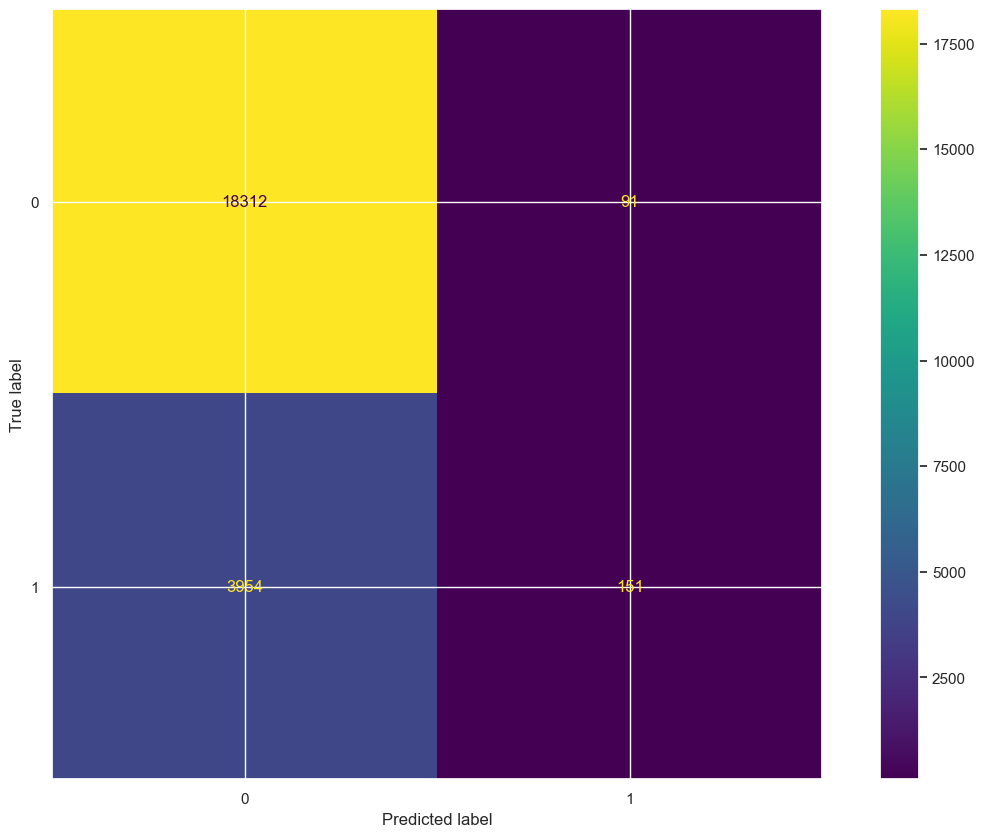

In [103]:
# Confusion matrix mostrado mas graficamente
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb);

In [104]:
# Porcentaje de valores correctamente predichos
print(f'{round((151+18312)/(len(y_test))*100,2)}%')

82.03%


In [105]:
# Guardo las metricas del modelo de XGBoost en un dataframe
report = classification_report(y_test, y_pred_xgb, output_dict=True)
xgb_metrics = pd.DataFrame(report).transpose()
xgb_metrics 

,precision,recall,f1-score,support
0,0.822420,0.995055,0.900538,18403.000000
1,0.623967,0.036784,0.069473,4105.000000
accuracy,0.820286,0.820286,0.820286,0.820286
macro avg,0.723193,0.515920,0.485006,22508.000000
weighted avg,0.786226,0.820286,0.748969,22508.000000


#### Utilizando KNeighborsClassifier

In [108]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC = KNC.fit(x_train, y_train)

In [109]:
y_pred_KNC = KNC.predict(x_test)

#### Metricas KNeighborsClassifier

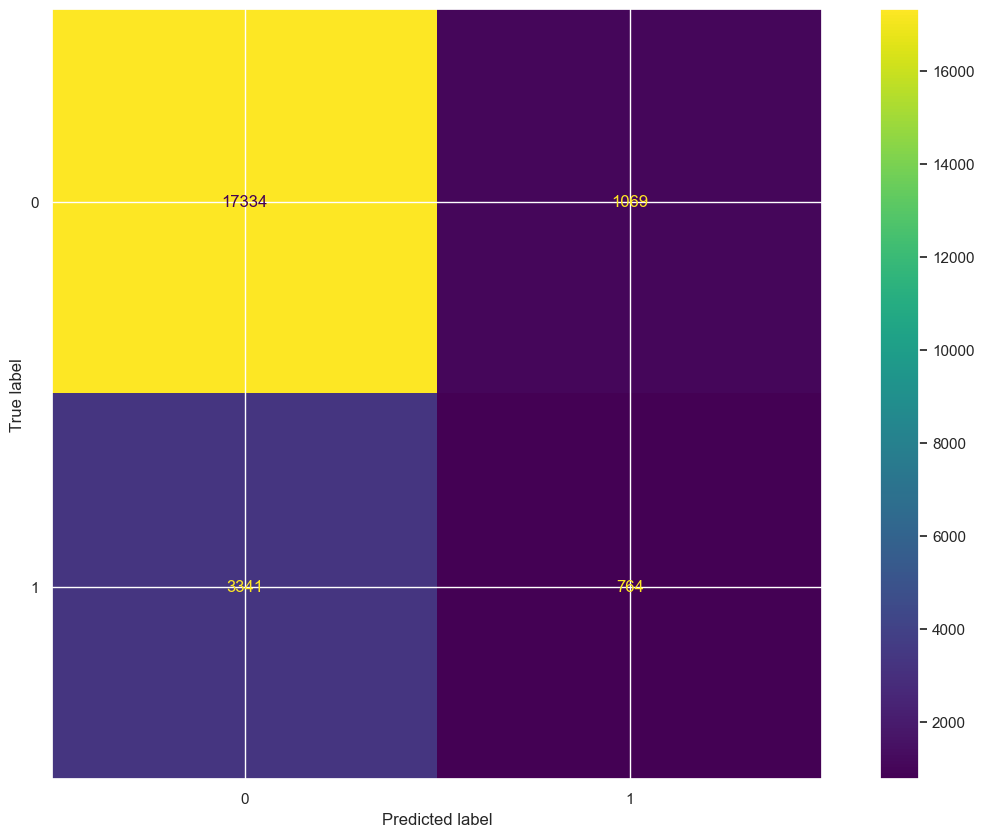

In [110]:
# Confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_KNC);

In [111]:
# Porcentaje de valores correctamente predichos
print(f'{round((764+17334)/(len(y_test))*100,2)}%')

80.41%


In [112]:
# Guardo las metricas del modelo de KNeighnorsClassifier en un dataframe
report = classification_report(y_test, y_pred_KNC, output_dict=True)
KNC_metrics = pd.DataFrame(report).transpose()
KNC_metrics 

,precision,recall,f1-score,support
0,0.838404,0.941912,0.887149,18403.00000
1,0.416803,0.186114,0.257326,4105.00000
accuracy,0.804070,0.804070,0.804070,0.80407
macro avg,0.627603,0.564013,0.572237,22508.00000
weighted avg,0.761512,0.804070,0.772282,22508.00000


#### Utilizando RandoForestClassifir

In [126]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(random_state=42)
model_RFC = model_RFC.fit(x_train, y_train)

In [127]:
y_pred_RFC = model_RFC.predict(x_test)

#### Metricas RandomForestClassifier

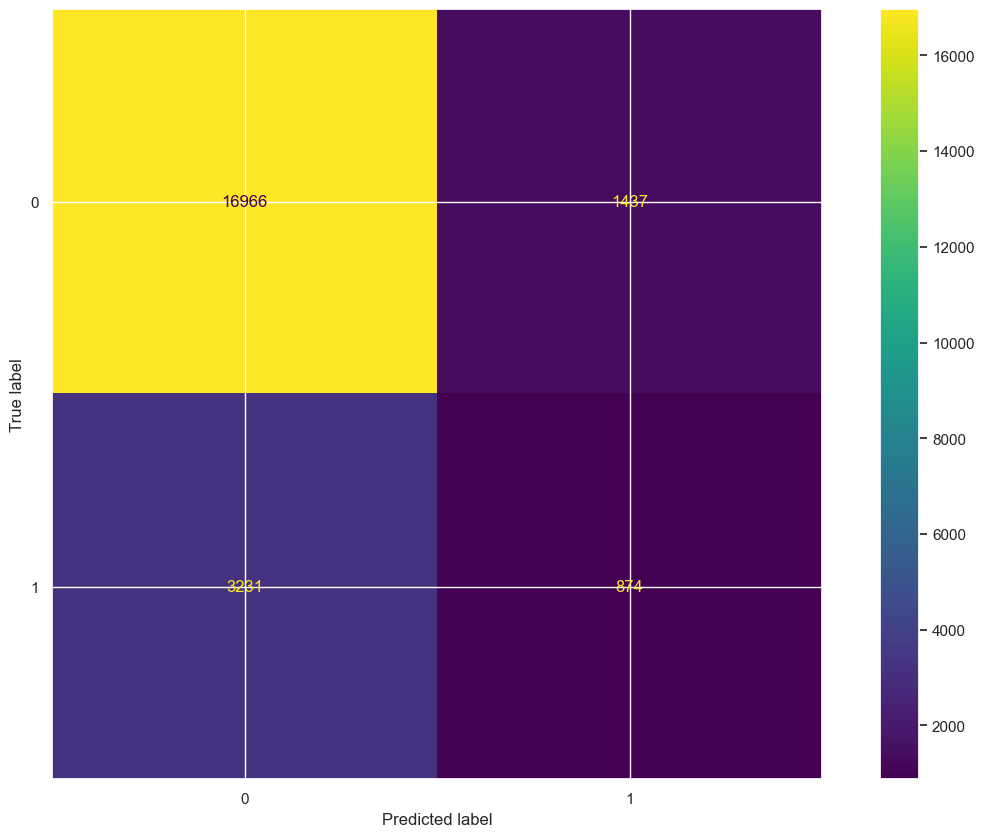

In [115]:
# Confusion matrix 
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_RFC);

In [116]:
# Porcentaje de valores correctamente predichos
print(f'{round((849+16985)/(len(y_test))*100,2)}%')

79.23%


In [117]:
# Guardo las metricas del modelo de RandomForestClassifier en un dataframe
report = classification_report(y_test, y_pred_RFC, output_dict=True)
RFC_metrics = pd.DataFrame(report).transpose()
RFC_metrics 

,precision,recall,f1-score,support
0,0.840026,0.921915,0.879067,18403.000000
1,0.378191,0.212911,0.272444,4105.000000
accuracy,0.792607,0.792607,0.792607,0.792607
macro avg,0.609109,0.567413,0.575756,22508.000000
weighted avg,0.755797,0.792607,0.768432,22508.000000


### Comparacion de modelos

In [118]:
y_test.value_counts('%')

0    0.81762
1    0.18238
Name: atraso_15, dtype: float64

Para comparar los modelos usaremos accuracy, f1_score_macro_avg y vamos agregar una tercera metrica que va a ser Matthews Correlation Coefficient (MCC). Para este caso, debido al imbalance de los labels, donde solo el 18% son atrasos, f1_score y MCC son mejores metricas para elegir nuesro modelo.

In [119]:
# Matthews Correlation Coefficient
from sklearn.metrics import matthews_corrcoef
MCC = [matthews_corrcoef(y_test, y_pred_logreg), matthews_corrcoef(y_test, y_pred_xgb),
      matthews_corrcoef(y_test, y_pred_KNC), matthews_corrcoef(y_test, y_pred_RFC)]

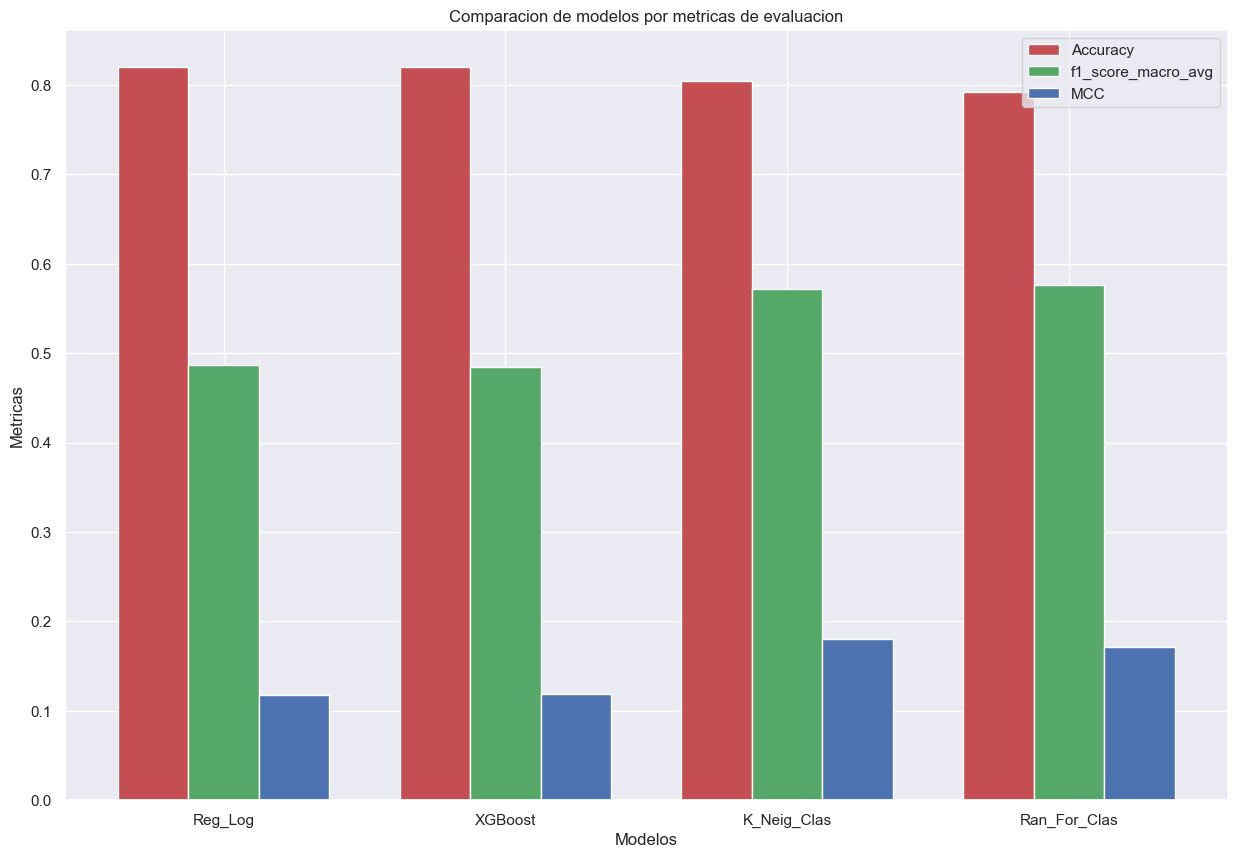

In [120]:
# Hacemos un grafico de barra para visualizar mejor y comparar los modelos

N = 4
ind = np.arange(N)
width = 0.25

accuracy= [logreg_metrics['f1-score'][2], xgb_metrics['f1-score'][2], KNC_metrics['f1-score'][2], 
           RFC_metrics['f1-score'][2]]
bar1 = plt.bar(ind, accuracy, width, color='r')

f1_score_macro_avg = [logreg_metrics['f1-score'][3], xgb_metrics['f1-score'][3], KNC_metrics['f1-score'][3], 
           RFC_metrics['f1-score'][3]]
bar2 = plt.bar(ind+width, f1_score_macro_avg, width, color='g')

bar3 = plt.bar(ind+width*2, MCC, width, color='b')

plt.xticks(ind+width, ['Reg_Log', 'XGBoost', 'K_Neig_Clas', 'Ran_For_Clas'])
plt.xlabel('Modelos')
plt.ylabel('Metricas')
plt.title('Comparacion de modelos por metricas de evaluacion')
plt.legend((bar1, bar2, bar3), ('Accuracy', 'f1_score_macro_avg', 'MCC'))
plt.show()


In [121]:
f1_score_macro_avg

[0.486727169913546,
 0.48500584680048364,
 0.5722372391264314,
 0.5757556238936338]

In [122]:
MCC

[0.11786973837275383,
 0.11921728056340931,
 0.1807571776793332,
 0.17152645173335176]

Del grafico de Comparacion de modelos por metricas de evaluacion y guiandonos por las metricas de f1-score y MCC al existir imbalance de clases, se observa que los modeos de KNeighbors y RandomForest se comportan bastante parecidos y suepran a los otros dos. Sin embargo por simplicidad y dado que KNeighbors no tiene un metodo en particular para calcular feature imprtance, optamos por  **RandomForestClassifier**.

#### Utilizando RandomForestClassifier dejando Features más importantes 

In [128]:
model_RFC.feature_importances_

array([3.83910895e-03, 1.29907986e-03, 8.62939846e-03, 9.93287329e-04,
       7.92298807e-04, 2.54318781e-03, 4.03057596e-04, 3.86811435e-03,
       4.67881597e-04, 3.18439362e-03, 7.31906638e-04, 5.74213088e-03,
       2.15594269e-02, 1.20477996e-03, 3.59587557e-03, 1.42478122e-03,
       4.03718901e-04, 1.56615399e-02, 1.55058385e-03, 2.05537733e-03,
       2.35484314e-03, 1.69710386e-02, 9.21186296e-04, 4.37774315e-01,
       7.26944235e-03, 7.62689528e-03, 8.08070125e-03, 6.54561817e-03,
       1.85222416e-03, 8.74778776e-04, 3.41867070e-03, 3.72378862e-03,
       1.96740567e-04, 5.67224100e-03, 9.29628673e-03, 6.64407706e-03,
       6.49238973e-04, 7.92522158e-04, 2.72298443e-05, 2.29193693e-03,
       3.83736820e-03, 1.29956475e-04, 7.81227115e-03, 5.33233640e-03,
       5.49969518e-03, 1.10064959e-05, 7.10618341e-04, 1.76483181e-03,
       2.87133844e-03, 9.76781557e-04, 8.51661586e-03, 2.57827334e-03,
       1.42270866e-03, 7.47496369e-03, 9.24068318e-03, 4.75081062e-04,
      

In [124]:
# Construimos funcin para plotear grafico de importancias
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

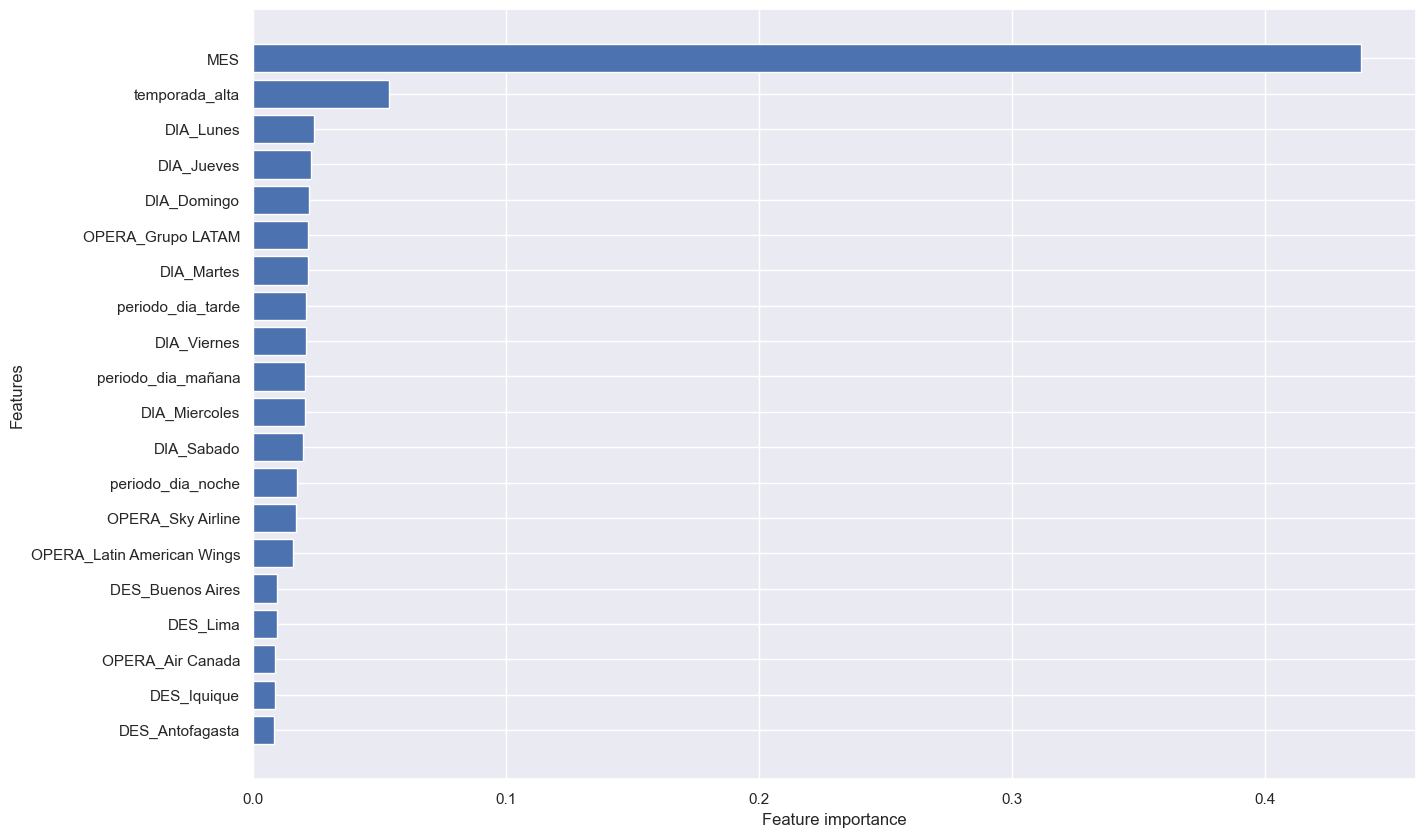

In [125]:

plot_features(x_train.columns, model_RFC.feature_importances_)

In [129]:
# Volvemos a entrenar el modelo seleccionado ahora con las features mas importantes

features_importantes = features[['MES', 'temporada_alta', 'DIA_Jueves', 'DIA_Domingo', 'DIA_Lunes', 'DIA_Miercoles', 
                                'OPERA_Grupo LATAM', 'periodo_dia_tarde', 'DIA_Martes', 'DIA_Viernes', 'periodo_dia_mañana',
                                'DIA_Sabado', 'periodo_dia_noche', 'OPERA_Sky Airline', 'OPERA_Latin American Wings',
                                'DES_Buenos Aires', 'DES_Puerto Montt', 'DES_Lima', 'DES_Iquique', 'OPERA_Air Canada']]
label = data["atraso_15"]

# Split Data
x_train2, x_test2, y_train2, y_test2 = train_test_split(features_importantes, label, test_size = 0.33, random_state = 42)

# Train model
model_RFC_2 = RandomForestClassifier(random_state=42)
model_RFC_2 = model_RFC_2.fit(x_train2, y_train2)

In [136]:
y_pred_RFC_2 = model_RFC_2.predict(x_test2)
y_pred_RFC_2[22506]

1

In [139]:
x_test2[22506:22507]

,MES,temporada_alta,DIA_Jueves,DIA_Domingo,DIA_Lunes,DIA_Miercoles,OPERA_Grupo LATAM,periodo_dia_tarde,DIA_Martes,DIA_Viernes,periodo_dia_mañana,DIA_Sabado,periodo_dia_noche,OPERA_Sky Airline,OPERA_Latin American Wings,DES_Buenos Aires,DES_Puerto Montt,DES_Lima,DES_Iquique,OPERA_Air Canada
54749,10,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Metricas RandomForestClassifier dejando metricas mas importantes

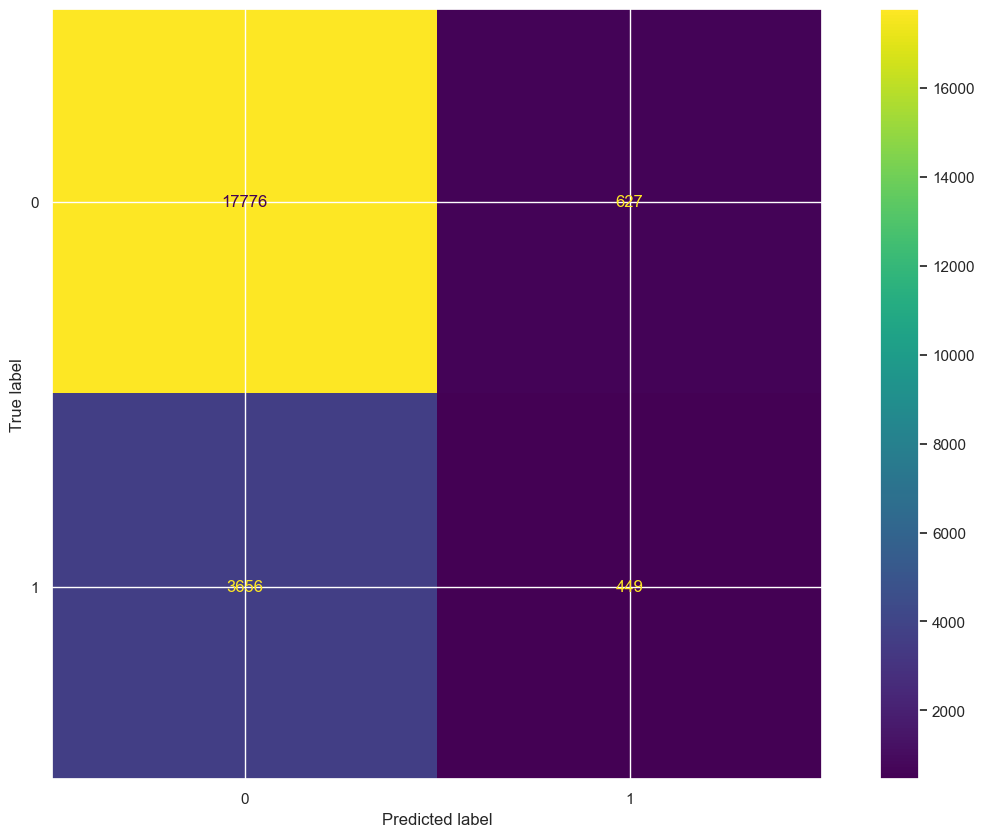

In [136]:
# Confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_test2, y_pred_RFC_2);

In [137]:
# Porcentaje de valores correctamente predichos
print(f'{round((449+17776)/(len(y_test2))*100,2)}%')

80.97%


In [138]:
# Guardo las metricas del modelo de RandomForestClassifier en un dataframe
report = classification_report(y_test2, y_pred_RFC_2, output_dict=True)
RFC_2_metrics = pd.DataFrame(report).transpose()
RFC_2_metrics 

,precision,recall,f1-score,support
0,0.829414,0.965929,0.892481,18403.000000
1,0.417286,0.109379,0.173326,4105.000000
accuracy,0.809712,0.809712,0.809712,0.809712
macro avg,0.623350,0.537654,0.532904,22508.000000
weighted avg,0.754250,0.809712,0.761322,22508.000000


In [139]:
matthews_corrcoef(y_test2, y_pred_RFC_2)

0.13630321632611034

### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar laperformance?

Los modelos utilizados en la sección anterior fueron:
* **Regresión Logística**: Fue seleccionado ya que es el modelo más simple para poder resolver problemas de clasificación.
* **XGBoost**: Fue seleccionado porque en general tiene un gran desempeño y entrega buenos resultados ya sea para regresión y clasificación, además es bastante rápido y facilita el tuneo de hiperparámetros.
* **KNeighborsClassifier**: Fue seleccionado, ya que se comporta bastante bien para problemas de clasificacion binaria y en general presenta un buen desempeno.
* **RandomForestClassifier**: Se selecciono este modelo, debido a su gran potencial al trabajar con varios submodelos a la vez tal como su nombre lo indica y su gran capacidad para encontrar patrones.

Al ser un problema de Clasificacion binaria, se usaron las metricas entregadas por la libreria de sklearn para dicho tipo de problema. Se evaluo cada modelo segun: Accuracy, Matrix Confusion, f1_score, precission, recall y Matthews Correlation Coefficient. Al existir un imbalance de clases entre atrasos y no atrasos, las metricas mas confiables para elegir nuestro modelo fueron f1_score y Matthews Correlation Coefficient. 

Al comparar las metricas, vemos que tanto el modelo de RandomForestClassifier como el de KneighborsClassifier presentan valores muy siilares para f1_score, bastante mejor que los otros dos. Al comparar el coeficiente de correlacion de matthews, vemos como el modelo de KNeighbors supera levemente al de RandomForest. Sin embargo, KNeighbors al no tener un meodo para calcular feature importance, se escoge RandomForest por mayor simpliciad. 

Para encontrar las variables que mas influyen en la desicion, se utilizo el metodo feature_importance de RandomForest, en donde se vio que las tres variables que mas influyen son: MES, DIA_Viernes y temporada_alta.

Hay que señalar que todos los modelos fueron malos, debido a la gran cantidad de falsos negativos. Una de las posibles razones, la más clara, es el desbalanceo que existe en la clase 'atraso_15'. Del total de datos un 82% corresponde a no atraso y el 18% restante a atraso.
Para poder mejorar la performance se tomaron dos decisiones, la primera aplicar un Grid Search CV sobre RandomForest para tunear de mejor manera los hiperparámetros y la segunda realizar un upsampling de la clase desbalanceada, en este caso los atrasos. 
Existen mas opciones que se podrian hacer en un futuro para seguir mejorando, como probar nuevos modelos o uno mas complejo.

De la perspectiva de los datos, si se quiere seguir mejorando, una opcion tambien seria recolectar mas datos para poder entrenar mejor al modelo. Tambien se podria mejorar la estrategia de autorrelenado para los valores faltantes (para el caso de periododia) junto con la estrategia de encoding (cambiar los valores no numericos a numericos).


### Mejorando el Modelo

In [140]:
model_RFC_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

#### Grid Search CV

In [141]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [142]:
# Creamos hyperparameter grid
param_grid = {'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]}

# Setup random seed
np.random.seed(42)

# setup RammomizedSearchCV para el modelo
model_RFC_GridCV = GridSearchCV(RandomForestClassifier(),
                               param_grid=param_grid)

# Fit the grid hyperparameter search model
model_RFC_GridCV.fit(x_train2, y_train2)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [148]:
y_pred_RFC_GridCV = model_RFC_GridCV.predict(x_test2)

In [149]:
model_RFC_GridCV.best_params_

{'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': 9,
 'n_estimators': 100}

In [150]:
# Guardo las metricas del modelo de RandomForestClassifier en un dataframe
report = classification_report(y_test2, y_pred_RFC_GridCV, output_dict=True)
RFC_GridCV_metrics = pd.DataFrame(report).transpose()
RFC_GridCV_metrics 

,precision,recall,f1-score,support
0,0.821796,0.995327,0.900275,18403.000000
1,0.607306,0.032400,0.061517,4105.000000
accuracy,0.819709,0.819709,0.819709,0.819709
macro avg,0.714551,0.513863,0.480896,22508.000000
weighted avg,0.782677,0.819709,0.747303,22508.000000


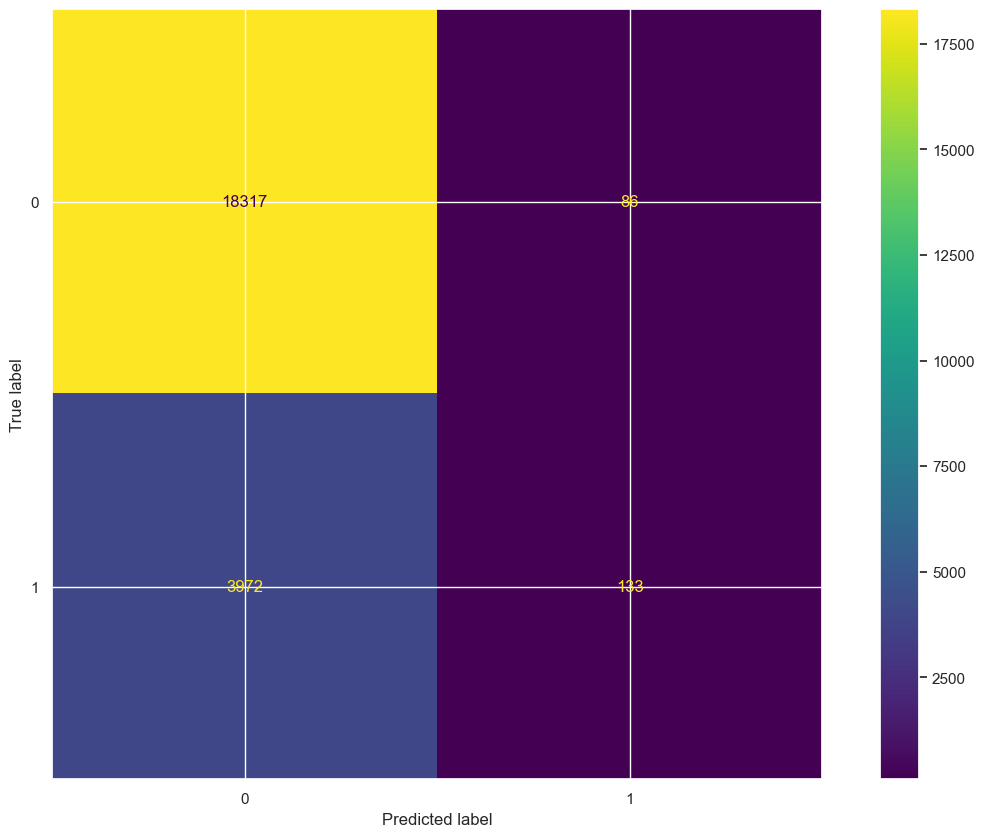

In [151]:
# Confusion matrix 
ConfusionMatrixDisplay.from_predictions(y_test2, y_pred_RFC_GridCV);

In [152]:
matthews_corrcoef(y_test2, y_pred_RFC_GridCV)

0.1090753030516862

Comparamos graficamente f1_score_macro_avg y MCC entre el modelo original de randomforest (model_RFC), el modelo  de randomforest simplificado con las deatures mas importantes (model_RFC_2) y el modelo de randomforest simplificado y tunizado (model_RFC_GridCV)

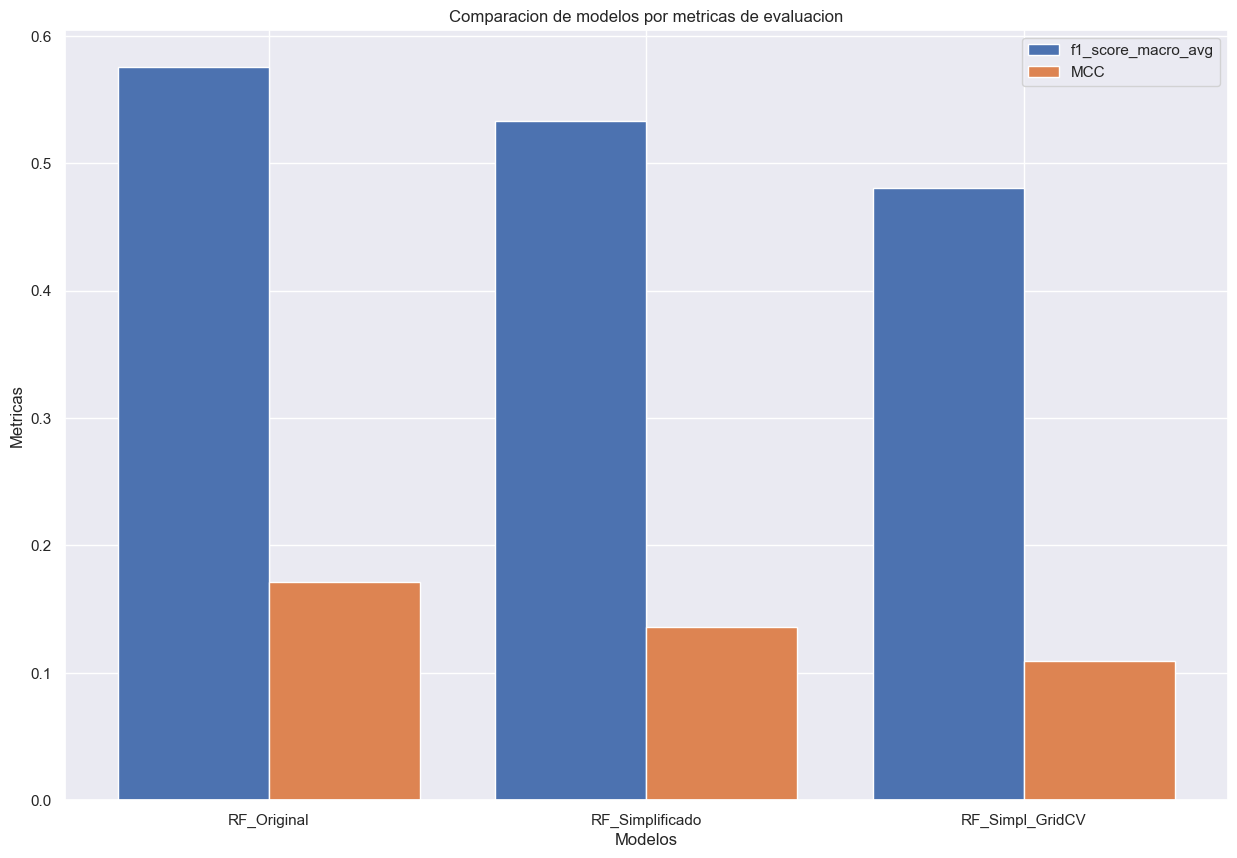

In [153]:
# Grafico para coparar modelos

X = ['RF_Original', 'RF_Simplificado', 'RF_Simpl_GridCV']
f1_score= [RFC_metrics['f1-score'][3], RFC_2_metrics['f1-score'][3], RFC_GridCV_metrics['f1-score'][3]]
MCC = [matthews_corrcoef(y_test, y_pred_RFC), matthews_corrcoef(y_test2, y_pred_RFC_2),
       matthews_corrcoef(y_test2, y_pred_RFC_GridCV)]


X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, f1_score, 0.4, label = 'f1_score_macro_avg')
plt.bar(X_axis + 0.2, MCC, 0.4, label = 'MCC')

plt.xticks(X_axis, X)
plt.xlabel('Modelos')
plt.ylabel('Metricas')
plt.title('Comparacion de modelos por metricas de evaluacion')
plt.legend()
plt.show()

Del grafico anterior vemos que el modelo original es el que tiene mejor performance.

Para seguir mejorando el modelo, se puede hacer lo que se meciono en la respuesta a la pregunta 5. Es decir, de la perspectiva de los datos se puede tratar de recolectar mas datos y mejorar el featuring engineering.

De la perpectiva del modelo, podemos seguir mejorando el modelo a traves de hyperparaeter tuning cambiando el rango de los parametros y volviendo a intentar con GridSearchCV, o simplemente buscar algun otro modelo que ajuste mejor.

Pero nuevamente hay que que tener en consideracion el imbalance de clases que se presenta, lo que dificulta la evaluacion para el problema.

Para la realizacion del test de estres, usaremoms el modelo RandomForest Simplificado.

### Guardando y cargando el modelo seleccionado

In [155]:
from joblib import dump, load

In [158]:
# Guardamos modelos
dump(model_RFC, 'random_forest_origial.pkl')
dump(model_RFC_2, 'random_forest_simplificado.pkl')
dump(model_RFC_GridCV, 'random_forest_GridCV.pkl')

['random_forest_GridCV.pkl']

In [161]:
# Loaded the saved model
loaded_model = load('random_forest_simplificado.pkl')

In [162]:
joblib_y_pred = loaded_model.predict(x_test2)

In [164]:
report = classification_report(y_test2, joblib_y_pred, output_dict=True)
joblib_metrics = pd.DataFrame(report).transpose()
joblib_metrics 

,precision,recall,f1-score,support
0,0.829414,0.965929,0.892481,18403.000000
1,0.417286,0.109379,0.173326,4105.000000
accuracy,0.809712,0.809712,0.809712,0.809712
macro avg,0.623350,0.537654,0.532904,22508.000000
weighted avg,0.754250,0.809712,0.761322,22508.000000


In [166]:
RFC_2_metrics

,precision,recall,f1-score,support
0,0.829414,0.965929,0.892481,18403.000000
1,0.417286,0.109379,0.173326,4105.000000
accuracy,0.809712,0.809712,0.809712,0.809712
macro avg,0.623350,0.537654,0.532904,22508.000000
weighted avg,0.754250,0.809712,0.761322,22508.000000


In [167]:
# Save features from training
rf_columns_original = list(x_train.columns)
dump(rf_columns_original, 'rf_columns_original.pkl')

rf_columns_simplificado = list(x_train2.columns)
dump(rf_columns_simplificado, 'rf_columns_simplificado.pkl')

['rf_columns_simplificado.pkl']